/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping InternetService_No due to high VIF: inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping OnlineSecurity_No internet service due to high VIF: inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping OnlineBackup_No internet service due to high VIF: inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping DeviceProtection_No internet service due to high VIF: inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping TechSupport_No internet service due to high VIF: inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping StreamingTV_No internet service due to high VIF: inf
Dropping MonthlyCharges due to high VIF: 866.0896396659763
Dropping PhoneService_Yes due to high VIF: 19.69692883254467
Dropping TotalCharges due to high VIF: 9.356008164267902


<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -13884.66
         time fit was run = 2025-02-04 16:35:25 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
SeniorCitizen                         -0.07      0.93      0.06           -0.18            0.04                0.83                1.04
gender_Male                           -0.09      0.92      0.05           -0.18            0.01                0.84                1.01
Partner_Yes                           -0.52      0.60      0.06           -0.63           -0.41                0.54                0.66
Dependents_Yes                        -0.05      0.95      0.07           -0.19            0.08                0.83                1.08
MultipleLines_No phone service        -0.09      0.91      0.10           -0.29            0.10                0.75                1.11
MultipleLines_Yes                     -0.46      0.63      0.05           -0.56           -0.35                0.57                0.70
InternetService_Fiber optic            0.39      1.47      0.07            0.24            0.53                1.28                1.70
OnlineSecurity_Yes                    -0.65      0.52      0.07           -0.78           -0.52                0.46                0.59
OnlineBackup_Yes                      -0.65      0.52      0.05           -0.76           -0.55                0.47                0.58
DeviceProtection_Yes                  -0.32      0.72      0.05           -0.43           -0.22                0.65                0.81
TechSupport_Yes                       -0.41      0.66      0.07           -0.54           -0.28                0.58                0.75
StreamingTV_Yes                       -0.04      0.96      0.05           -0.15            0.07                0.86                1.07
StreamingMovies_No internet service   -1.10      0.33      0.12           -1.34           -0.86                0.26                0.42
StreamingMovies_Yes                   -0.13      0.87      0.05           -0.24           -0.03                0.79                0.97
Contract_One year                     -1.62      0.20      0.09           -1.79           -1.44                0.17                0.24
Contract_Two year                     -3.23      0.04      0.16           -3.56           -2.91                0.03                0.05
PaperlessBilling_Yes                   0.18      1.20      0.06            0.07            0.29                1.07                1.34
PaymentMethod_Credit card (automatic) -0.08      0.92      0.09           -0.26            0.09                0.77                1.10
PaymentMethod_Electronic check         0.59      1.80      0.07            0.45            0.73                1.56                2.07
PaymentMethod_Mailed check             0.57      1.76      0.09            0.39            0.74                1.48                2.09

                                       cmp to      z      p  -log2(p)
covariate                                                            
SeniorCitizen                            0.00  -1.27   0.21      2.28
gender_Male                              0.00  -1.84   0.07      3.94
Partner_Yes                              0.00  -9.39 <0.005     67.22
Dependents_Yes                           0.00  -0.79   0.43      1.22
MultipleLines_No phone service           0.00  -0.93   0.35      1.50
MultipleLines_Yes                        0.00  -8.60 <0.005     56.82
InternetService_Fiber optic              0.00   5.34 <0.005     23.34
OnlineSecuri

<Axes: xlabel='log(HR) (95% CI)'>

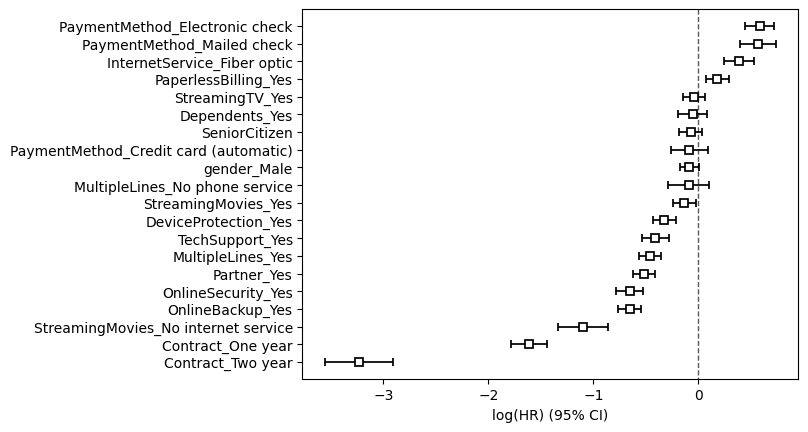

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Ensure column names are unique
df = df.loc[:, ~df.columns.duplicated()]

# Convert 'TotalCharges' to numeric (handle missing values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert 'Churn' column to binary (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert categorical variables into dummy variables
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop non-numeric and non-relevant columns
df = df.drop(columns=['customerID'])

# Drop missing values
df = df.dropna()

# Standardize continuous variables
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[continuous_cols] = (df[continuous_cols] - df[continuous_cols].mean()) / df[continuous_cols].std()

# ✅ Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# ✅ Drop rows with Inf or NaN values multiple times
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# ✅ Convert to float before applying VIF
df = df.astype(float)

# ✅ Check for any remaining object (non-numeric) columns and drop them
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print(f"Dropping non-numeric columns: {non_numeric_cols}")
df = df.drop(columns=non_numeric_cols)

# Function to remove multicollinear features using Variance Inflation Factor (VIF)
def remove_high_vif(data, threshold=5.0):
    """
    Removes columns with high Variance Inflation Factor (VIF).
    """
    dropped = True
    while dropped:
        dropped = False
        vif_data = pd.DataFrame()
        vif_data["Feature"] = data.columns
        vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

        max_vif = vif_data["VIF"].max()
        if max_vif > threshold:
            col_to_drop = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
            print(f"Dropping {col_to_drop} due to high VIF: {max_vif}")
            data = data.drop(columns=[col_to_drop])
            dropped = True  # Continue checking

    return data

# ✅ Drop 'Churn' column before computing VIF (it is the target variable)
X = df.drop(columns=['Churn'])

# ✅ Final NaN and dtype check before VIF computation
X = X.replace([np.inf, -np.inf], np.nan).dropna().astype(float)

# ✅ Run VIF computation on cleaned dataset
X = remove_high_vif(X)

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(X.assign(Churn=df['Churn']), duration_col='tenure', event_col='Churn')

# Print summary of the model
cph.print_summary()

# Plot the coefficients
cph.plot()

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=3e6bcb3c641a25f1e5571c612013428e48cebd3700face35adb2dc028db98e3a
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma
